<a href="https://colab.research.google.com/github/MengOonLee/Deep_learning/blob/master/TensorFlow2/Tutorial/Sequential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sequential model API

## Coding tutorials
#### [1. Building a Sequential model](#coding_tutorial_1)
#### [2. Convolutional and pooling layers](#coding_tutorial_2)
#### [3. The compile method](#coding_tutorial_3)
#### [4. The fit method](#coding_tutorial_4)
#### [5. The evaluate and predict methods](#coding_tutorial_5)

In [1]:
import tensorflow as tf
# Enable GPU dynamic memory allocation
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)
print(tf.__version__)

2.3.0


***
## Load the data

In [2]:
from tensorflow.keras.preprocessing import image

# Load the Fashion-MNIST data
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

# Print the shape of the training data
print("Train data shape: {}".format(train_images.shape))

# Define the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("Train label at 0:", train_labels[0])

4423680/4422102 [==============================] - 0s 0us/step
Train data shape: (60000, 28, 28)
Train label at 0: 9


In [3]:
# Rescale the image values so that they lie in between 0 and 1
train_images = train_images / 255.
test_images = test_images / 255.

label: Coat


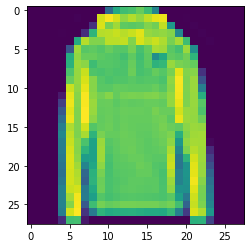

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Display one of the images
i = 24
img = train_images[i,:,:]
print(f"label: {labels[train_labels[i]]}")
plt.imshow(img)
plt.show()

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

#### Build a feedforward neural network model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Build the sequential feedforward neural network model

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(16, activation='relu', name='layer_1'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-6.9233790e-02,  5.8522046e-02,  2.6419848e-02, ...,
         -5.3504035e-03,  2.4988100e-02, -2.4945278e-02],
        [-5.2435171e-02, -5.8341622e-03,  8.0525875e-05, ...,
          3.9904863e-03,  1.5947402e-02, -2.0433992e-02],
        [ 8.1912652e-02,  5.1083282e-02, -4.2355794e-02, ...,
         -3.9651506e-02,  5.8342770e-02,  8.1238449e-02],
        ...,
        [ 8.6028099e-02,  2.6401356e-03,  6.7857057e-03, ...,
          3.3484779e-02, -6.8532370e-02,  2.8012924e-02],
        [-2.0256750e-02,  1.0446250e-02, -1.1034809e-02, ...,
         -3.3293292e-03, -4.6585649e-02, -2.8197117e-02],
        [ 6.3909858e-02, -5.9097633e-02, -2.1865666e-03, ...,
         -8.6461678e-02, -7.2425880e-02,  7.1706027e-03]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'd

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [7]:
# Define the model optimizer, loss function and metrics
model.compile(optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'top_k_categorical_accuracy'])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.01>


In [8]:
import numpy as np 

# Fit the model
history = model.fit(train_images, train_labels,
    epochs=8, batch_size=32, verbose=2)

Epoch 1/8
1875/1875 - 3s - loss: 1.7580 - accuracy: 0.4346 - top_k_categorical_accuracy: 0.6198
Epoch 2/8
1875/1875 - 3s - loss: 1.1330 - accuracy: 0.6301 - top_k_categorical_accuracy: 0.5978
Epoch 3/8
1875/1875 - 3s - loss: 0.9022 - accuracy: 0.7020 - top_k_categorical_accuracy: 0.5967
Epoch 4/8
1875/1875 - 3s - loss: 0.7831 - accuracy: 0.7443 - top_k_categorical_accuracy: 0.5828
Epoch 5/8
1875/1875 - 3s - loss: 0.6950 - accuracy: 0.7787 - top_k_categorical_accuracy: 0.5519
Epoch 6/8
1875/1875 - 3s - loss: 0.6289 - accuracy: 0.7969 - top_k_categorical_accuracy: 0.5325
Epoch 7/8
1875/1875 - 3s - loss: 0.5832 - accuracy: 0.8079 - top_k_categorical_accuracy: 0.5280
Epoch 8/8
1875/1875 - 3s - loss: 0.5510 - accuracy: 0.8166 - top_k_categorical_accuracy: 0.5250


       loss  accuracy  top_k_categorical_accuracy
0  1.757991  0.434567                    0.619800
1  1.132994  0.630067                    0.597833
2  0.902155  0.701950                    0.596683
3  0.783082  0.744283                    0.582800
4  0.695008  0.778717                    0.551950


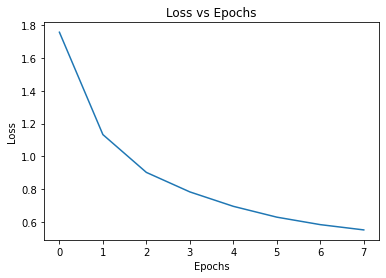

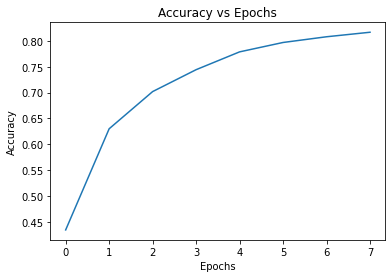

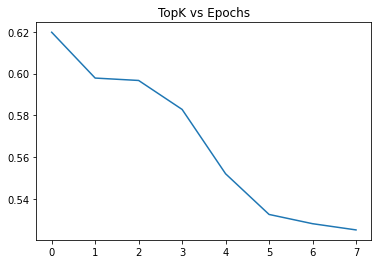

In [9]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [10]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images, 
    test_labels, verbose=2)

313/313 - 0s - loss: 0.5697 - accuracy: 0.8085 - top_k_categorical_accuracy: 0.5167


#### Make predictions from the model

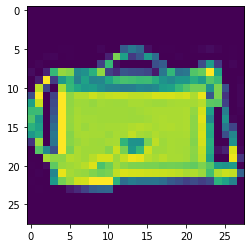

Label: Bag
Model predictions: Bag


In [11]:
# Choose a random test image

random_idx = np.random.choice(test_images.shape[0])
test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...])
print(f"Model predictions: {labels[np.argmax(pred)]}")

***
<a id="coding_tutorial_2"></a>
## Convolution and pooling layers
#### Build a convolutional neural network model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, kernel_size=3, padding='SAME', strides=2, 
        activation='relu', input_shape=(28,28,1), 
        data_format='channels_last'),
    MaxPooling2D(pool_size=3, data_format='channels_last'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 17,258
Trainable params: 17,258
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [13]:
# Define the model optimizer, loss function and metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy, \
    SparseTopKCategoricalAccuracy

model.compile(optimizer=Adam(learning_rate=1e-3),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy(),
        SparseTopKCategoricalAccuracy()])

# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [14]:
import numpy as np 

# Fit the model
history = model.fit(train_images[...,np.newaxis], train_labels,
    epochs=8, batch_size=32)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6229 - sparse_categorical_accuracy: 0.7763 - sparse_top_k_categorical_accuracy: 0.9886
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4320 - sparse_categorical_accuracy: 0.8433 - sparse_top_k_categorical_accuracy: 0.9973
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3959 - sparse_categorical_accuracy: 0.8547 - sparse_top_k_categorical_accuracy: 0.9977
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - sparse_categorical_accuracy: 0.8625 - sparse_top_k_categorical_accuracy: 0.9978
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3552 - sparse_categorical_accuracy: 0.8685 - sparse_top_k_categorical_accuracy: 0.9982
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3428 - sparse_categorical_accuracy: 0.8720 - sparse_top_k_categorical_accuracy: 0.9982
Epoch 7/8
1875/1

       loss  sparse_categorical_accuracy  sparse_top_k_categorical_accuracy
0  0.622894                     0.776250                           0.988600
1  0.432048                     0.843267                           0.997250
2  0.395898                     0.854683                           0.997700
3  0.373523                     0.862500                           0.997833
4  0.355245                     0.868467                           0.998217


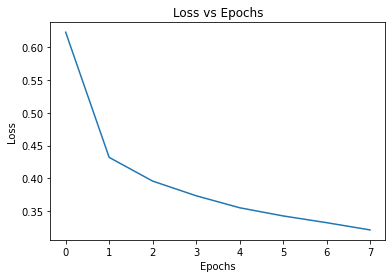

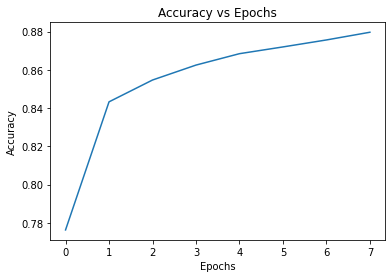

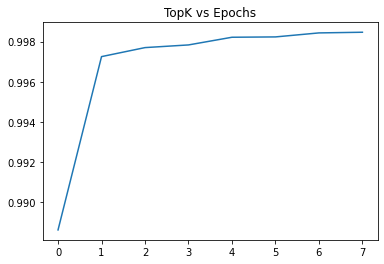

In [15]:
# Plot training history
import pandas as pd

# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
print(df.head())

# Make a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs Epochs", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")
plt.show()

# Make a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy",
    title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")
plt.show()

# Make a plot for the topK
topk_plot = df.plot(y="sparse_top_k_categorical_accuracy",
    title="TopK vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="TopK")
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods
#### Evaluate the model on the test set

In [16]:
# Evaluate the model
test_loss, test_acc, test_topk = model.evaluate(test_images[...,np.newaxis], 
    test_labels, verbose=2)

313/313 - 1s - loss: 0.3782 - sparse_categorical_accuracy: 0.8587 - sparse_top_k_categorical_accuracy: 0.9978


#### Make predictions from the model

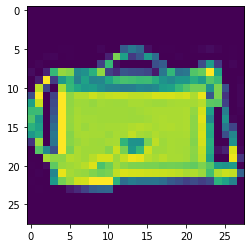

Label: Bag
Model predictions: Bag


In [17]:
# Choose a random test image

test_image = test_images[random_idx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_idx]]}")

# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model predictions: {labels[np.argmax(pred)]}")